Loading dataset...
Dataset loaded successfully.

First few rows:
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Checking missing values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Model Coefficients:
Intercept: -32.40
Coefficient for RM: 8.76

 Model Performan

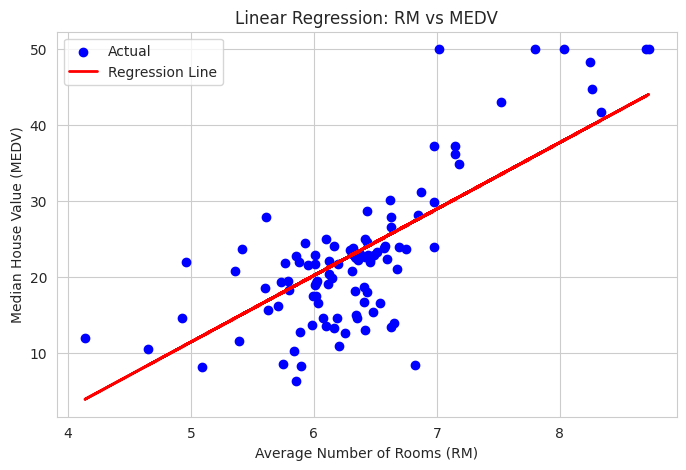


 Task Complete. Results saved to 'simple_linear_regression_output.csv'.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# ----------------- Load and Explore Dataset ----------------- #
def load_data():
    print("Loading dataset...")
    url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    data = pd.read_csv(url)
    print("Dataset loaded successfully.")
    return data

def explore_data(df):
    print("\nFirst few rows:\n", df.head())
    print("\nChecking missing values:\n", df.isnull().sum())

# ----------------- Train a Linear Regression Model ----------------- #
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_train, X_test, y_train, y_test

# ----------------- Evaluate Model ----------------- #
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    print("\n Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return y_test, y_pred

# ----------------- Visualization ----------------- #
def plot_regression(X_test, y_test, y_pred):
    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Average Number of Rooms (RM)')
    plt.ylabel('Median House Value (MEDV)')
    plt.title('Linear Regression: RM vs MEDV')
    plt.legend()
    plt.show()

# ----------------- Main Execution ----------------- #
def main():
    df = load_data()
    explore_data(df)

    X = df[['rm']]  # Feature
    y = df['medv']  # Target

    model, X_train, X_test, y_train, y_test = train_model(X, y)
    print("\nModel Coefficients:")
    print(f"Intercept: {model.intercept_:.2f}")
    print(f"Coefficient for RM: {model.coef_[0]:.2f}")

    y_test, y_pred = evaluate_model(model, X_test, y_test)
    plot_regression(X_test, y_test, y_pred)

    # Save predictions
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    results.to_csv('simple_linear_regression_output.csv', index=False)
    print("\n Task Complete. Results saved to 'simple_linear_regression_output.csv'.")

# Run the workflow
main()


Loading dataset...
Dataset loaded successfully.

First few rows:
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Checking missing values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Model Coefficients:
Intercept: 24.05
   Feature  Coefficient
0       rm     3.81

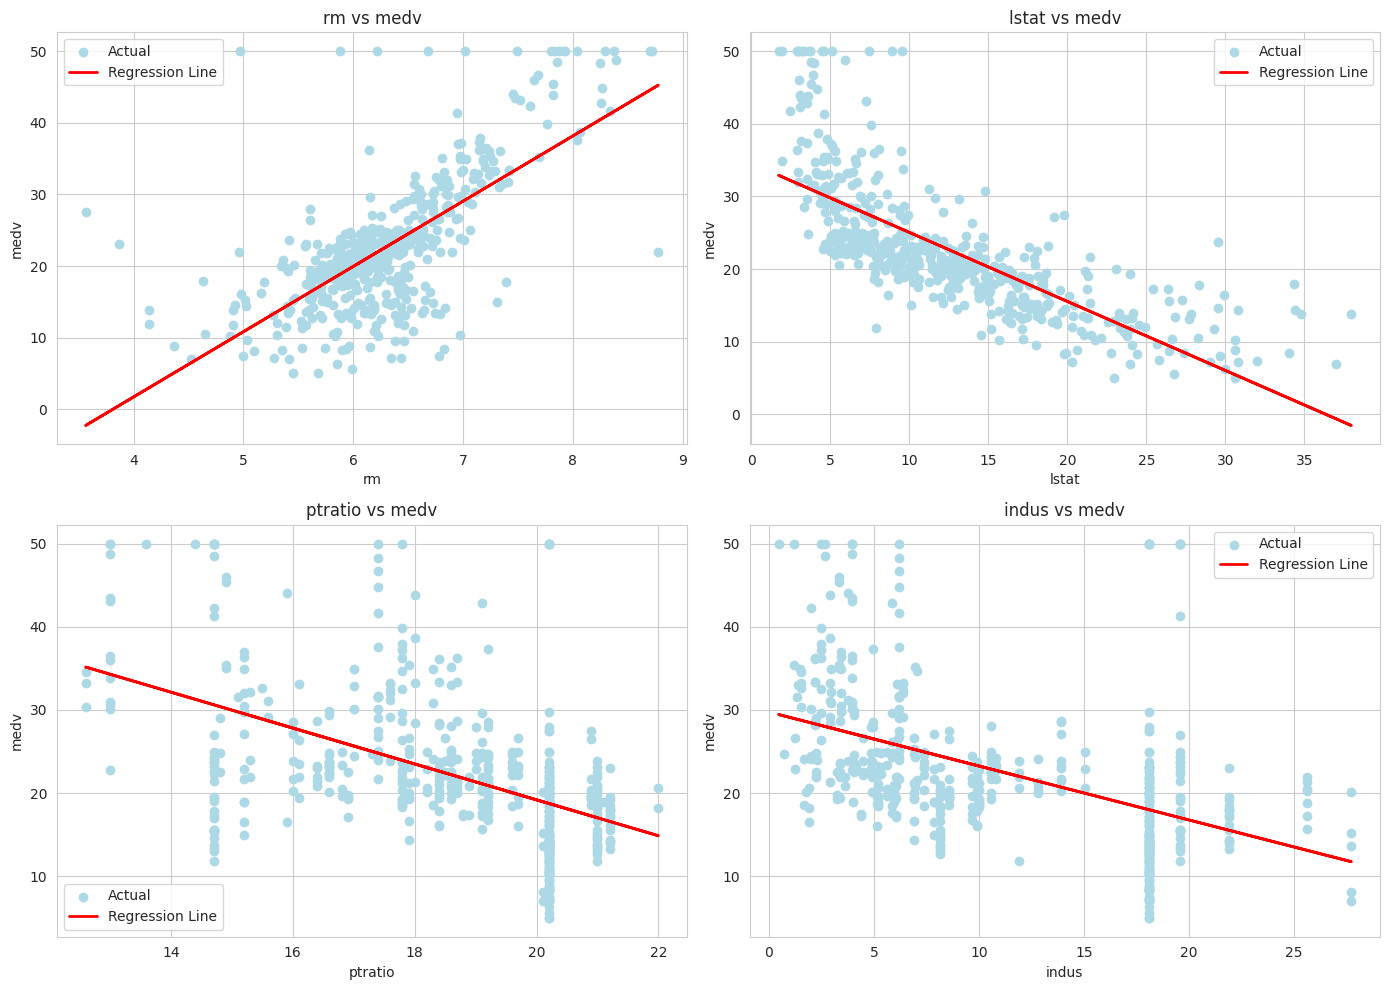


Task Complete. Results saved to 'multiple_linear_regression_with_lines_output.csv'.


In [5]:
# Multiple Linear Regression – With Multiple Regression Lines

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# ----------------- Load and Explore Dataset ----------------- #
def load_data():
    print("Loading dataset...")
    url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    data = pd.read_csv(url)
    print("Dataset loaded successfully.")
    return data

def explore_data(df):
    print("\nFirst few rows:\n", df.head())
    print("\nChecking missing values:\n", df.isnull().sum())

# ----------------- Train a Multiple Linear Regression Model ----------------- #
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_train, X_test, y_train, y_test

# ----------------- Evaluate Model ----------------- #
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    print("\n Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    return y_test, y_pred

# ----------------- Plot Multiple Regression Lines ----------------- #
def plot_multiple_regressions(df, model, features, y_name):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()

    for idx, feature in enumerate(features):
        X_plot = df[[feature]]
        y_plot = df[y_name]

        model_simple = LinearRegression()
        model_simple.fit(X_plot, y_plot)
        y_pred_plot = model_simple.predict(X_plot)

        axs[idx].scatter(X_plot, y_plot, color='lightblue', label='Actual')
        axs[idx].plot(X_plot, y_pred_plot, color='red', linewidth=2, label='Regression Line')
        axs[idx].set_title(f'{feature} vs {y_name}')
        axs[idx].set_xlabel(feature)
        axs[idx].set_ylabel(y_name)
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

# ----------------- Main Execution ----------------- #
def main():
    df = load_data()
    explore_data(df)

    features = ['rm', 'lstat', 'ptratio', 'indus']  # Multiple features
    X = df[features]
    y = df['medv']

    model, X_train, X_test, y_train, y_test = train_model(X, y)
    print("\nModel Coefficients:")
    print(f"Intercept: {model.intercept_:.2f}")
    coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
    print(coef_df)

    y_test, y_pred = evaluate_model(model, X_test, y_test)

    plot_multiple_regressions(df, model, features, 'medv')

    # Save predictions
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    results.to_csv('multiple_linear_regression_with_lines_output.csv', index=False)
    print("\nTask Complete. Results saved to 'multiple_linear_regression_with_lines_output.csv'.")

# Run the workflow
main()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample Data: House Price Prediction based on area, bedrooms, age
data = {
    'Area': [2600, 3000, 3200, 3600, 4000],
    'Bedrooms': [3, 4, 3, 5, 4],
    'Age': [20, 15, 18, 30, 8],
    'Price': [550000, 565000, 610000, 595000, 760000]
}

# Load data into a DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Area', 'Bedrooms', 'Age']]  # independent variables
y = df['Price']                      # dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Output model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Intercept: 432857.1428571424
Coefficients: [   76.78571429 18928.57142857 -6964.28571429]
Mean Squared Error: 4825286989.795914
R-squared: nan


Slope (coefficient): 0.6
Intercept: 2.2
Prediction for x=6: 5.8


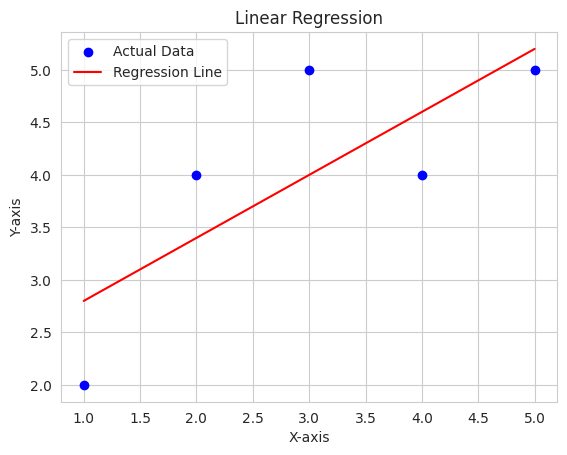

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))  # Reshape X to a 2D array
y = np.array([2, 4, 5, 4, 5])

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients (slope and intercept)
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

# Make predictions
y_pred = model.predict(X)


new_x = np.array([[6]])
new_y_pred = model.predict(new_x)
print("Prediction for x=6:", new_y_pred[0])

import matplotlib.pyplot as plt
# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("X-axis")  # add X-axis label
plt.ylabel("Y-axis")  # add Y-axis label
plt.title("Linear Regression")  # add title
plt.legend()
plt.show()